<h1> Intorduction

Further information: Demographics of New York (https://en.wikipedia.org/wiki/Demographics_of_New_York_City)

New York City's demographics show that it is a large and ethnically diverse metropolis.It is the largest city in the United States with a long history of international immigration. New York City was home to over 8.3 million people in 2019,accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States.

This final project explores the best locations for a Italian restaurants through the city of New York. As per the current situation that all of us are living with the COVID-19, maybe is a beat risky to invest and open a new restaurant, for this reason my client wants to know how many Italian restaurants there are today and analyze if it would be a good decision, but as New York is the most diverse city in the world (800 languages are spoken in New York), it has a long tradition of different ethnical restaurants.
Opening a new restaurant requires serious considerations and is more complicated than it seems from the first glance. In particular, the location of the restaurant is one of the most important factors that will affect whether it will have success or a failure. So our project will attempt to answer the questions “Where should the investor open a Japanese Restaurant?” and “Where should I go If I want great Japanese food?”

<h1>Data


In order to answer the above questions, data on New York City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

All data related to locations will be obtained via the FourSquare API utilized via the Request library in Python.

<h1>Methodology

    • Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

    • FourSquare be used to locate all venues and then filtered by bike shops Ratings, tips, and likes by users will be counted and added to the dataframe.

    • Data will be sorted based on rankings.

    • Finally, the data be will be visually assessed using graphing from Python libraries.

<h1> Problem Statement

    1.What is / are the best location(s) for Italian restaurant in New York City?
    2.In what Neighborhood and/or borough should the investor open bike shop to have the best chance of being successful?
    3.Where would I go in New York City for a best Italian restaurant?

<h2>Before we get the data and start exploring it, let's import all required libraries .

In [1]:
pip install geopy

     |████████████████████████████████| 112kB 19.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

import json # library to handle JSON files

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-21.2.0               |     pyhd8ed1ab_0          44 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    entrypoints-0.3            |  pyhd8ed1ab_1003           8 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    jsonschema-3.2.0           |     pyhd8ed1ab_3          45 KB  conda-forge
    pandas-1.1.5               |   py36h284efc9_0        11.3 MB  conda-

<h2>My Variables

In [38]:
# Define Foursquare Credentials and Version. 
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
ACCESS_TOKEN =  # your FourSquare Access Token
VERSION = '20180604'

<H2>Functions

In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

<h2>Now let's use the above codes to get our initial NYC data

In [5]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
ny_data.shape

(306, 4)

<h2>Initial Data Analysis

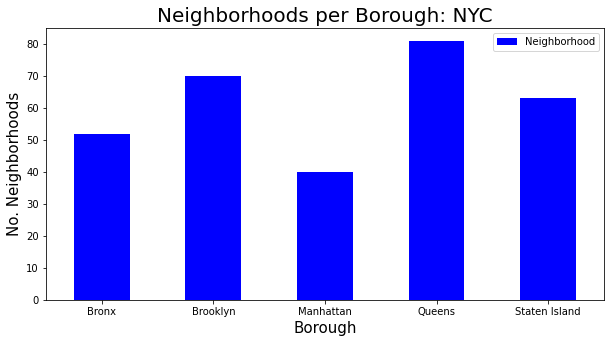

In [7]:
clr = "blue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

<h2>Let's analyze further and see how many Italian restaurants there are in each neighborhood and borough. After it, graph the results.

In [8]:
# queens has most neighborhoods
# prepare neighborhood list that contains Italian restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_restaurant_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_restaurant = venues[venues['Category']=='Italian Restaurant']   
    print('(', count, '/',len(ny_data), ')', 'Italian Restaurant in '+Neighborhood+', '+Borough+':'+str(len(italian_restaurant)))
    print(row)
    for restaurant_detail in italian_restaurant.values.tolist():
        id, name, category = restaurant_detail
        italian_restaurant_ny = italian_restaurant_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Restaurant in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Italian Restaurant in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Italian Restaurant in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Italian Restaurant in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Italian Restaurant in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Italian Restaurant in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Italian Restaurant in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Italian Restaurant in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Italian Restaurant in Norwood, Bronx:0
['Bronx', '

In [9]:
# Save the information so far to a .csv file due to limited calls on FourSquare
italian_restaurant_ny.to_csv('italian_restaurant_ny.csv')

In [10]:
italian_ny= pd.read_csv('italian_restaurant_ny.csv')
italian_restaurant_ny.tail()

,Borough,Neighborhood,ID,Name
224,Manhattan,Flatiron,53370455498e18d7e6607a1d,La Pizza & La Pasta
225,Manhattan,Flatiron,4b741ab4f964a5202cc82de3,Novità Cucina Creativa
226,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's
227,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's
228,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde


In [11]:
italian_restaurant_ny.shape

(229, 4)

<h5>We got 229 Italian Restaurants across the New York City.

We can see below that Manhatan has the highest number of Italian restaurants.

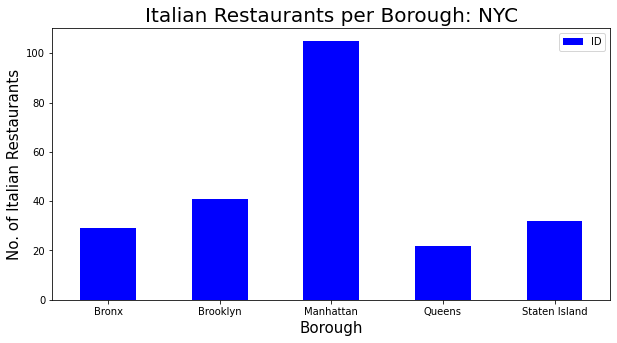

In [12]:
italian_restaurant_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Italian Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Italian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

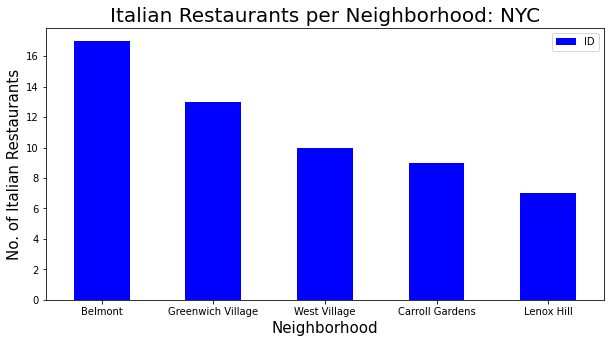

In [13]:
NOofNeigh = 5 # top number for graphing all the same past 5
italian_restaurant_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Italian Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Italian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [14]:
italian_restaurant_ny[italian_restaurant_ny['Neighborhood']=='Belmont']

,Borough,Neighborhood,ID,Name
6,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
7,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
8,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
9,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
10,Bronx,Belmont,4b5514c4f964a5207cda27e3,Enzo's
11,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant
12,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant
13,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
14,Bronx,Belmont,4aa193d5f964a520124120e3,Mario's Restaurant & Catering
15,Bronx,Belmont,4bc22a22920eb713bcc51b2c,Tra Di Noi


Now is time to get the ranking of each restaurant. 

In [15]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stat_ny=pd.DataFrame(columns=column_names)
count=1
for row in italian_restaurant_ny.values.tolist():
    if count > 50: # foursquare request venue limited to 50, there is 229 Italian Restaurants. 
        break  
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_restaurant_ny),')','processed')
    italian_rest_stat_ny = italian_rest_stat_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
italian_rest_stat_ny.tail()

{'meta': {'code': 200, 'requestId': '60a92fd88d5c83354dada2fa'}, 'response': {'venue': {'id': '511edb6de4b0d58346fd272d', 'name': "Patrizia's Of Woodlawn", 'contact': {'phone': '7188845700', 'formattedPhone': '(718) 884-5700'}, 'location': {'address': '4358 Katonah Ave', 'lat': 40.900638399332884, 'lng': -73.86772361835486, 'labeledLatLngs': [{'label': 'display', 'lat': 40.900638399332884, 'lng': -73.86772361835486}, {'label': 'entrance', 'lat': 40.900601, 'lng': -73.867611}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4358 Katonah Ave', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patrizias-of-woodlawn/511edb6de4b0d58346fd272d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}],

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
45,Brooklyn,Carroll Gardens,5766ad56498ebf269c3737d2,Gersi,85,7.9,17
46,Brooklyn,Carroll Gardens,4a32d7ebf964a520a29a1fe3,Enoteca on Court,60,7.0,27
47,Brooklyn,Carroll Gardens,5001e284e4b0d8ae060e1035,Ciros on Smith,8,7.0,5
48,Brooklyn,Carroll Gardens,4ab98ab8f964a520cf7f20e3,Marco Polo Ristorante,33,6.8,14
49,Brooklyn,Carroll Gardens,4babeff5f964a52023d73ae3,Mama Maria's,11,5.8,9


In [16]:
italian_rest_stat_ny.to_csv('italian_rest_stat_ny_csv.csv')

In [18]:
italian_rest_stat_ny.shape

(50, 7)

Let's check what values we have in our DataFrame

In [19]:
italian_rest_stat_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     object 
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


We see that the values like Likes, Tips are string values. We would need to convert them into float for further analysis

In [20]:
italian_rest_stat_ny['Likes'] = italian_rest_stat_ny['Likes'].astype('float64')
italian_rest_stat_ny['Tips'] = italian_rest_stat_ny['Tips'].astype('float64')
italian_rest_stat_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


<h2>Let´s continue our analysis 

In [21]:
italian_rest_stat_ny.describe()

,Likes,Rating,Tips
count,50.000000,50.000000,50.00000
mean,38.180000,7.782000,17.52000
std,35.347078,0.876377,13.26533
min,3.000000,5.700000,1.00000
25%,11.250000,7.225000,6.25000
50%,25.500000,7.900000,13.50000
75%,51.750000,8.400000,27.00000
max,147.000000,9.300000,48.00000


In [22]:
#Restaurant with maximum likes
italian_rest_stat_ny.iloc[italian_rest_stat_ny['Likes'].idxmax()]

Borough                            Bronx
Neighborhood                     Belmont
ID              4acf80aef964a52025d420e3
Name                 Tino's Delicatessen
Likes                                147
Rating                               9.3
Tips                                  48
Name: 6, dtype: object

As we can see on the above analysis Tino´s Delicatessen is the best Italian Restaurant as per customers likes

In [23]:
#Maximun Ratings
italian_rest_stat_ny.iloc[italian_rest_stat_ny['Rating'].idxmax()]

Borough                            Bronx
Neighborhood                     Belmont
ID              4acf80aef964a52025d420e3
Name                 Tino's Delicatessen
Likes                                147
Rating                               9.3
Tips                                  48
Name: 6, dtype: object

In [24]:
#Maximun Tips
italian_rest_stat_ny.iloc[italian_rest_stat_ny['Tips'].idxmax()]

Borough                            Bronx
Neighborhood                     Belmont
ID              4acf80aef964a52025d420e3
Name                 Tino's Delicatessen
Likes                                147
Rating                               9.3
Tips                                  48
Name: 6, dtype: object

As we can see on the above analysis Tino´s Delicatessen is the best Italian Restaurant.

<h2>Now let's identify and visualize neighborhood with the maximum average rating of restaurants

In [25]:
ny_neighborhood_stats=italian_rest_stat_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
5,Bushwick,9.200000
2,Bedford Stuyvesant,9.100000
8,Cobble Hill,8.533333
19,Woodlawn,8.400000
16,Pelham Gardens,8.400000
13,Morris Park,8.400000
7,City Island,8.200000
3,Belmont,8.029412
15,Pelham Bay,7.900000
1,Bedford Park,7.800000


Above are the top neighborhoods with the highest average ratings of Italian restaurants.

In [31]:
ny_borough_stats=italian_rest_stat_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Bronx,7.878571
1,Brooklyn,7.659091


Let's visualize the results

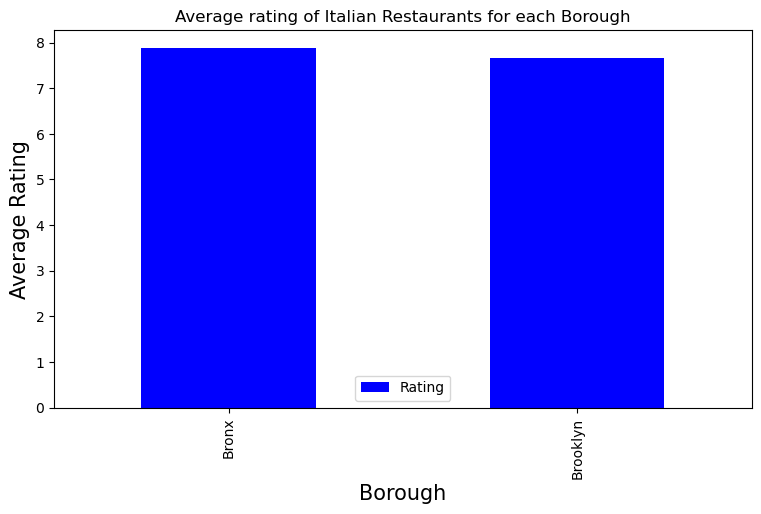

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Italian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
italian_rest_stat_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

In [34]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
2,Bedford Stuyvesant,9.100000
3,Belmont,8.029412
5,Bushwick,9.200000
7,City Island,8.200000
8,Cobble Hill,8.533333
13,Morris Park,8.400000
16,Pelham Gardens,8.400000
19,Woodlawn,8.400000


We will join this Dataset to original New York data to get longitude and latitude

In [35]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,9.100000
1,Bronx,Belmont,40.857277,-73.888452,8.029412
2,Brooklyn,Bushwick,40.698116,-73.925258,9.200000
3,Bronx,City Island,40.847247,-73.786488,8.200000
4,Brooklyn,Cobble Hill,40.687920,-73.998561,8.533333
5,Bronx,Morris Park,40.847549,-73.850402,8.400000
6,Bronx,Pelham Gardens,40.862966,-73.841612,8.400000
7,Bronx,Woodlawn,40.898273,-73.867315,8.400000


Now we will show this data on a map

In [36]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Let's add a new field to dataframe for labeling purpose

In [37]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

<h1>Results / Conclusion

On our initial data analysis we can see that Queens has the biggest amount of neighborhoods, however we got a total of 229 Italian restaurants across the New York city and Manhattan is the borough with the highest number of Italian restaurants, but Belmont is the neighborhoods belonging to the borough of the Bronx with the largest number of Italian restaurants.

On the other hand, if you want to go to the best Italian restaurant, as per our analysis, Tino's Decatessen has the best Rating.

In conclusion, according to our analysis, I would suggest opening the Italian restaurant in the borough of Queens, since it has the largest number of neighborhoods and the least number of Italian restaurants, another option would be Brooklyn since it does not have a very high number of Italian restaurants,from my point of view it is a good location since it is a more touristy area.